In [1]:
import pandas as pd
import numpy as np
import os

In [5]:
graph_path = '/Users/siriusxiao/Documents/Github/2DNMR_data/alignment_mpnn/graphs_3d'
hnmr_path = '/Users/siriusxiao/Documents/Github/2DNMR_data/alignment_mpnn/hnmr_alignment_csv_mpnn'
cnmr_path = '/Users/siriusxiao/Documents/Github/2DNMR_data/alignment_mpnn/cnmr_alignment_csv_mpnn'
graph_list = os.listdir(graph_path)
cnmr_list = os.listdir(cnmr_path)
hnmr_list = os.listdir(hnmr_path)

In [6]:
graph_list = [x.split('.')[0] for x in graph_list] #22179
cnmr_list = [x.split('.')[0] for x in cnmr_list] #20146
hnmr_list = [x.split('.')[0] for x in hnmr_list] #4874

cnmr_set = set(graph_list).intersection(set(cnmr_list)) 
hnmr_set = set(graph_list).intersection(set(hnmr_list)) 
common_set = cnmr_set.intersection(hnmr_set)
cnmr_only_list = list(cnmr_set.difference(common_set)) #17310
hnmr_only_list = list(hnmr_set.difference(common_set)) #2819
common_list = list(common_set) #4868

In [14]:
# join with smile, save to csv
smile_df = pd.read_csv('/Users/siriusxiao/Documents/Github/2DNMR_data/alignment_mpnn/combined_smiles.csv')
cnmr_smile = smile_df[smile_df['id'].astype(str).isin(cnmr_only_list)]
hnmr_smile = smile_df[smile_df['id'].astype(str).isin(hnmr_only_list)]
common_smile = smile_df[smile_df['id'].astype(str).isin(common_list)]
print(len(cnmr_smile))
print(len(hnmr_smile))
print(len(common_smile))

17310
2050
2819


In [15]:
common_smile.head()

,Unnamed: 0,id,SMILES_x,SMILES_y,smiles
90,90,4137,[H]Oc1c([H])c([H])c2c(c1O[H])C(=O)c1c([H])c([H...,[H]Oc1c([H])c([H])c2c(c1O[H])C(=O)c1c([H])c([H...,[H]Oc1c([H])c([H])c2c(c1O[H])C(=O)c1c([H])c([H...
156,156,4257,[H]OC1([H])C([H])([H])C2([H])C([H])(C3([H])C([...,[H]OC1([H])C([H])([H])C2([H])C([H])(C3([H])C([...,[H]OC1([H])C([H])([H])C2([H])C([H])(C3([H])C([...
203,203,4320,[H]OC1(C(=O)OC([H])([H])[H])OC2([H])C([H])([H]...,[H]OC1(C(=O)OC([H])([H])[H])OC2([H])C([H])([H]...,[H]OC1(C(=O)OC([H])([H])[H])OC2([H])C([H])([H]...
234,234,4366,[H]c1nc2c3c(n(C([H])([H])[H])c([H])c3c1[H])C(=...,[H]c1nc2c3c(n(C([H])([H])[H])c([H])c3c1[H])C(=...,[H]c1nc2c3c(n(C([H])([H])[H])c([H])c3c1[H])C(=...
247,247,4386,[H]OC12OC(=O)C(C([H])([H])[H])=C1C([H])([H])C1...,[H]OC12OC(=O)C(C([H])([H])[H])=C1C([H])([H])C1...,[H]OC12OC(=O)C(C([H])([H])[H])=C1C([H])([H])C1...


In [17]:
cnmr_smile = cnmr_smile.to_csv('data_csv/1dnmr/cnmr_smile_mpnn_17k.csv')
hnmr_smile = hnmr_smile.to_csv('data_csv/1dnmr/hnmr_smile_mpnn_3k.csv')
common_smile = common_smile.to_csv('data_csv/1dnmr/common_smile_mpnn_5k.csv')

#### data check #C #H

In [86]:
import pickle

cnmr_smile = pd.read_csv('data_csv/1dnmr/cnmr_smile_mpnn_17k.csv')
hnmr_smile = pd.read_csv('data_csv/1dnmr/hnmr_smile_mpnn_3k.csv')
common_smile = pd.read_csv('data_csv/1dnmr/common_smile_mpnn_5k.csv')

graph_path = '/Users/siriusxiao/Documents/Github/2DNMR_data/alignment_mpnn/graphs_3d'
hnmr_path = '/Users/siriusxiao/Documents/Github/2DNMR_data/alignment_mpnn/hnmr_alignment_csv_mpnn'
cnmr_path = '/Users/siriusxiao/Documents/Github/2DNMR_data/alignment_mpnn/cnmr_alignment_csv_mpnn'

c_file = []
h_file = []
common_file = []
for i in range(len(cnmr_smile)):
    filename = cnmr_smile.iloc[i]['id'].astype(str)
    graph_file = os.path.join(graph_path, filename + '.pickle')
    graph_data = pickle.load(open(graph_file, 'rb'))
    graph_data_c = graph_data.x[graph_data.x[:,0]==5]
    cnmr_file = os.path.join(cnmr_path, filename + '.csv')
    cnmr_data = pd.read_csv(cnmr_file)['ppm']
    if len(graph_data_c) != len(cnmr_data):
        c_file.append(filename)

for i in range(len(hnmr_smile)):
    filename = hnmr_smile.iloc[i]['id'].astype(str)
    graph_file = os.path.join(graph_path, filename + '.pickle')
    graph_data = pickle.load(open(graph_file, 'rb'))
    graph_data_c = graph_data.x[graph_data.x[:,0]==5]

    c_nodes = (graph_data.x[:,0]==5).nonzero(as_tuple=True)[0]
    h_nodes = (graph_data.x[:, 0] == 0).nonzero(as_tuple=True)[0] 

    # ##### calculate the indices of H node connected to C
    # # Initialize a list to store H nodes connected to C
    # h_nodes_connected_to_c = []
    # # Check each H node for connection to any C node
    # for h_node in h_nodes:
    #     # Get indices of edges involving the H node
    #     edges_of_h = (graph_data.edge_index[0] == h_node) | (graph_data.edge_index[1] == h_node)

    #     # Get all nodes that are connected to this C node
    #     connected_nodes = set(np.concatenate((graph_data.edge_index[0][edges_of_h], graph_data.edge_index[1][edges_of_h])))

    #     # Check if any of these connected nodes are H nodes
    #     if any(node in c_nodes for node in connected_nodes):
    #         h_nodes_connected_to_c.append(h_node.item())

    
    hnmr_file = os.path.join(hnmr_path, filename + '.csv')
    hnmr_data = pd.read_csv(hnmr_file)['ppm']
    if len(h_nodes) != len(hnmr_data):
        h_file.append(filename)
    

for i in range(len(common_smile)):
    filename = common_smile.iloc[i]['id'].astype(str)
    graph_file = os.path.join(graph_path, filename + '.pickle')
    graph_data = pickle.load(open(graph_file, 'rb'))
    # graph_data_c = graph_data.x[graph_data.x[:,0]==5]

    c_nodes = (graph_data.x[:,0]==5).nonzero(as_tuple=True)[0]
    h_nodes = (graph_data.x[:, 0] == 0).nonzero(as_tuple=True)[0] 

    # ##### calculate the indices of H node connected to C
    # # Initialize a list to store H nodes connected to C
    # h_nodes_connected_to_c = []
    # # Check each H node for connection to any C node
    # for h_node in h_nodes:
    #     # Get indices of edges involving the H node
    #     edges_of_h = (graph_data.edge_index[0] == h_node) | (graph_data.edge_index[1] == h_node)

    #     # Get all nodes that are connected to this C node
    #     connected_nodes = set(np.concatenate((graph_data.edge_index[0][edges_of_h], graph_data.edge_index[1][edges_of_h])))

    #     # Check if any of these connected nodes are H nodes
    #     if any(node in c_nodes for node in connected_nodes):
    #         h_nodes_connected_to_c.append(h_node.item())

    
    hnmr_file = os.path.join(hnmr_path, filename + '.csv')
    hnmr_data = pd.read_csv(hnmr_file)['ppm']
    cnmr_file = os.path.join(cnmr_path, filename + '.csv')
    cnmr_data = pd.read_csv(cnmr_file)['ppm']

    if (len(h_nodes) != len(hnmr_data)) or (len(c_nodes) != len(cnmr_data)):
        common_file.append(filename)


In [87]:
print(len(h_file), len(c_file), len(common_file))

1694 68 2018


In [101]:
filtered_c = cnmr_smile[~cnmr_smile['id'].astype(str).isin(c_file)]
filtered_h = hnmr_smile[~hnmr_smile['id'].astype(str).isin(h_file)]
filtered_com = common_smile[~common_smile['id'].astype(str).isin(common_file)]
filtered_c.to_csv('data_csv/1dnmr/mpnn_filtered_cnmr_smile_17k.csv')
filtered_h.to_csv('data_csv/1dnmr/mpnn_filtered_hnmr_smile_356.csv')
filtered_com.to_csv('data_csv/1dnmr/mpnn_filtered_common_smile_801.csv')

In [100]:
len(filtered_c)

17242

In [53]:
len(c_file)

68

In [58]:
len(common_file)

2070

In [57]:
'14149' in common_file

False

In [136]:
import py3Dmol

filename = common_file[5]
graph_file = os.path.join(graph_path, filename + '.pickle')
graph_data = pickle.load(open(graph_file, 'rb'))
data = graph_data

print(data.x.shape)

c_nodes = (graph_data.x[:,0]==5).nonzero(as_tuple=True)[0]
h_nodes = (graph_data.x[:, 0] == 0).nonzero(as_tuple=True)[0] 

print('c', len(c_nodes), 'h', len(h_nodes))
# Assuming pos_array is your array of positions and edge_index is your edge information
pos_array = data.pos.numpy().astype(float) if not isinstance(data.pos, np.ndarray) else data.pos
edge_index = data.edge_index.numpy() if not isinstance(data.edge_index, np.ndarray) else data.edge_index

# Create a view for the 3D visualization
view = py3Dmol.view(width=700, height=500)

# Add atoms to the view
for i, atom in enumerate(pos_array):
    # Determine atom type
    atom_type = data.x[i, 0]  # Assuming the atom type is in the first column of data.x

    # Assign color based on atom type
    if atom_type == 5:  # Carbon
        color = 'blue'
    elif atom_type == 0:  # Hydrogen
        color = 'red'
    else:  # Other atoms
        color = 'grey'

    atom = pos_array[i]
    view.addSphere({'center': {'x': atom[0], 'y': atom[1], 'z': atom[2]}, 
                    'radius': 0.4, 'color': color})
    
    # Add atom index label (numbering starts from 1)
    view.addLabel(f"{i+1}", {'position': {'x': atom[0], 'y': atom[1], 'z': atom[2]},
                             'backgroundColor': 'lightgray', 'fontColor': 'black', 'fontSize': 12})


# Add bonds to the view
for bond in edge_index.T:
    atom1 = pos_array[bond[0]]
    atom2 = pos_array[bond[1]]
    view.addCylinder({'start': {'x': atom1[0], 'y': atom1[1], 'z': atom1[2]},
                      'end': {'x': atom2[0], 'y': atom2[1], 'z': atom2[2]},
                      'radius': 0.05, 'color': 'grey'})

# Adjust the style as needed
# view.setStyle({'stick': {}})

# Show the molecule
view.show()

torch.Size([59, 3])
c 24 h 28


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [103]:
h_nodes_connected_to_c = []
# Check each H node for connection to any C node
for h_node in h_nodes:
# Get indices of edges involving the H node
    edges_of_h = (graph_data.edge_index[0] == h_node) | (graph_data.edge_index[1] == h_node)

    # Get all nodes that are connected to this C node
    connected_nodes = set(np.concatenate((graph_data.edge_index[0][edges_of_h], graph_data.edge_index[1][edges_of_h])))

    # Check if any of these connected nodes are H nodes
    if any(node in c_nodes for node in connected_nodes):
        h_nodes_connected_to_c.append(h_node.item())

In [137]:
hnmr_file = os.path.join(hnmr_path, filename + '.csv')
hnmr_data = pd.read_csv(hnmr_file)
cnmr_file = os.path.join(cnmr_path, filename + '.csv')
cnmr_data = pd.read_csv(cnmr_file)
len(cnmr_data)

24

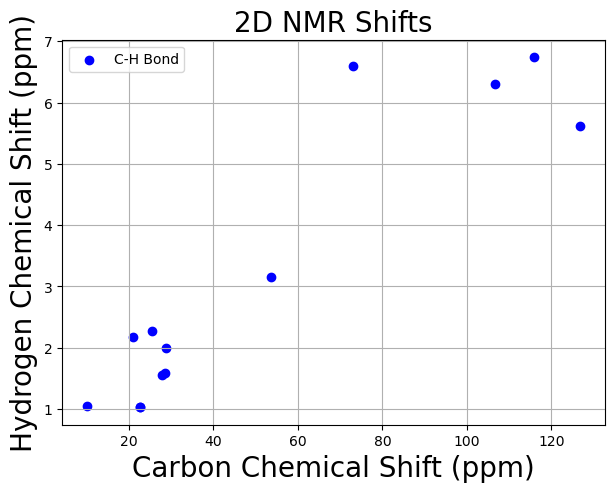

In [152]:
c_nodes = (graph_data.x[:,0]==5).nonzero(as_tuple=True)[0]
h_nodes = (graph_data.x[:, 0] == 0).nonzero(as_tuple=True)[0] 

# Extracting edge information
edge_index = graph_data['edge_index'].numpy()

# Prepare lists to collect ppm values for C-H connections
c_ppm_values = []
h_ppm_values = []

# Iterate through the edges to map C-H connections
for edge in edge_index.T:
    c_idx, h_idx = edge
    
    # Find the ppm value for the current C atom
    c_ppm = cnmr_data[cnmr_data['atom'] == c_idx]['ppm'].values[0] if not cnmr_data[cnmr_data['atom'] == c_idx].empty else None
    
    # Adjust h_idx to match DataFrame indexing if necessary
    # This example assumes direct correspondence
    h_ppm = hnmr_data[hnmr_data['atom'] == h_idx]['ppm'].values[0] if not hnmr_data[hnmr_data['atom'] == h_idx].empty else None
    
    # Append ppm values to the lists
    if c_ppm is not None and h_ppm is not None:
        c_ppm_values.append(c_ppm)
        h_ppm_values.append(h_ppm)

# Plotting
plt.figure(figsize=(7, 5))
plt.scatter(c_ppm_values, h_ppm_values, color='blue', marker='o', label='C-H Bond')
plt.xlabel('Carbon Chemical Shift (ppm)', fontsize=20)
plt.ylabel('Hydrogen Chemical Shift (ppm)', fontsize=20)
plt.title('2D NMR Shifts', fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

In [148]:
len(edge_index_h)

28

In [149]:
c_nodes

tensor([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 17, 18, 19, 20, 21,
        24, 25, 26, 27, 28, 29])

In [143]:
h_nodes

tensor([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57, 58])

In [139]:
import matplotlib.pyplot as plt

c_indices = data.edge_index[0].numpy()
h_indices = data.edge_index[1].numpy() - len(cnmr_data)  # Adjust H indices if necessary

# Extract ppm values for C and H atoms involved in bonds
c_ppm = cnmr_data.iloc[c_indices]['ppm'].values
h_ppm = hnmr_data.iloc[h_indices]['ppm'].values

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(c_ppm, h_ppm, color='blue', label='C-H Bond')
plt.xlabel('Carbon Chemical Shift (ppm)')
plt.ylabel('Hydrogen Chemical Shift (ppm)')
plt.title('C-H Bond Correlation')
plt.legend()
plt.grid(True)
plt.show()

IndexError: positional indexers are out-of-bounds

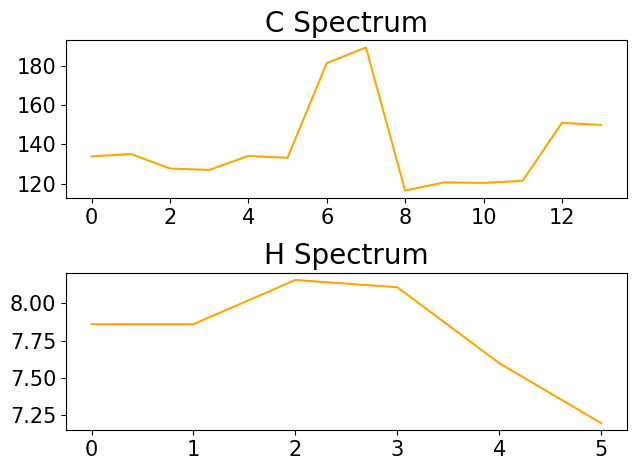

In [118]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(211)
plt.plot(np.arange(len(cnmr_data)), cnmr_data, color='orange')
plt.title('C Spectrum', fontsize=20)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)

plt.subplot(212)
plt.plot(np.arange(len(hnmr_data)), hnmr_data, color='orange')
plt.title('H Spectrum', fontsize=20)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.tight_layout()


In [70]:
len(h_nodes_connected_to_c) == len(hnmr_data) 

False

In [71]:
len(c_nodes) == len(cnmr_data)

True

In [72]:
len(c_nodes)

16

In [84]:
pd.read_csv(hnmr_file)

,atom,ppm
0,10,7.81
1,11,6.40
2,12,8.49
3,13,10.32


In [85]:
h_nodes

tensor([10, 11, 12, 13])